In [1]:
from IPython.display import display, HTML

display(HTML(data="""
<style>
    div#notebook-container    { width: 95%; }
    div#menubar-container     { width: 65%; }
    div#maintoolbar-container { width: 99%; }
</style>
"""))

In [2]:
#im skipping leap days currently in multiple places
import sys
import os
import numpy as np
import pickle
import matplotlib.pyplot as plt
import datetime
import pandas as pd
import seaborn
import random
import json
import pickle
import time
import copy

%load_ext autoreload
%autoreload 2
%matplotlib inline

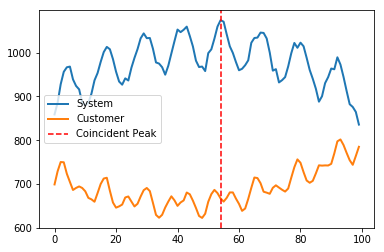

In [133]:
t = np.arange(0,100,1)

noise_1 = np.random.rand(100,)

load_growth = -0.05*np.power(t-50,2) 

system_load = (50*np.sin(0.5*t + 100) + 1000) + 30*noise_1 + load_growth


customer_load_droop = 20*np.sin(0.5*t + 50) + 0.04*np.power(t-40,2)

noise_2 = np.random.rand(100,)

customer_load = (20*np.sin(0.9*t + 100) + 650) + 10*noise_2 + customer_load_droop




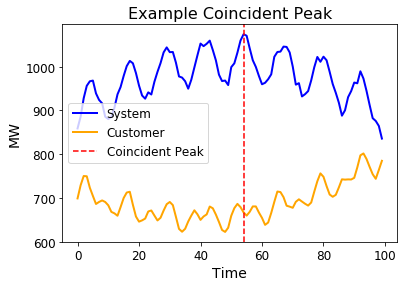

In [152]:
plt.plot(system_load.T, lw=2, label="System", color="blue")
plt.plot(customer_load, lw=2, label="Customer", color="orange")
plt.axvline(x=np.argmax(system_load), color="red", ls="--", label="Coincident Peak")
plt.legend(loc=6, fontsize=12)
plt.title("Example Coincident Peak", fontsize=16)
plt.xlabel("Time", fontsize=14)
plt.xticks(fontsize=12)
plt.ylabel("MW", fontsize=14)
plt.yticks(fontsize=12)
plt.show()

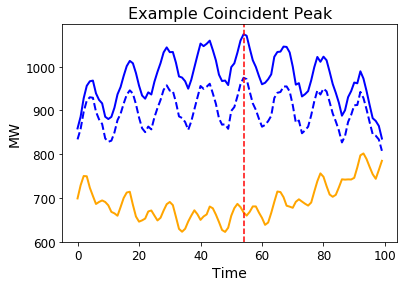

In [153]:
t = np.arange(0,100,1)


load_growth = -0.05*np.power(t-50,2) 
shaved_load = -0.02*np.power(t-50,2)

system_load = (50*np.sin(0.5*t + 100) + 1000) + 30*noise_1 + load_growth
system_shaved = (50*np.sin(0.5*t + 100) + 900) + 30*noise_1 + shaved_load



customer_load_droop = 20*np.sin(0.5*t + 50) + 0.04*np.power(t-40,2)


customer_load = (20*np.sin(0.9*t + 100) + 650) + 10*noise_2 + customer_load_droop

plt.plot(system_load.T, lw=2, color="blue", label="System")
plt.plot(system_shaved, lw=2, color="blue", ls="--", label="Peak Shaved System")
plt.plot(customer_load, lw=2, color="orange", label="Customer")
plt.axvline(x=np.argmax(system_load), color="red", ls="--", label="Coincident Peak")
#plt.legend(loc=6, fontsize=12)
plt.title("Example Coincident Peak", fontsize=16)
plt.xlabel("Time", fontsize=14)
plt.xticks(fontsize=12)
plt.ylabel("MW", fontsize=14)
plt.yticks(fontsize=12)
plt.show()

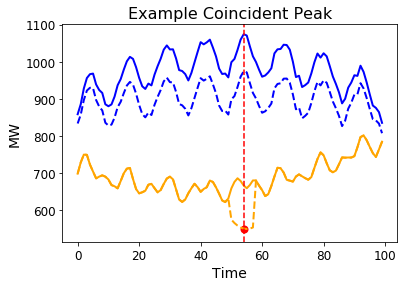

In [172]:
t = np.arange(0,100,1)


load_growth = -0.05*np.power(t-50,2) 
shaved_load = -0.02*np.power(t-50,2)

system_load = (50*np.sin(0.5*t + 100) + 1000) + 30*noise_1 + load_growth
system_shaved = (50*np.sin(0.5*t + 100) + 900) + 30*noise_1 + shaved_load



customer_load_droop = 20*np.sin(0.5*t + 50) + 0.04*np.power(t-40,2)

customer_savings = np.argmax(system_load)


customer_load = (20*np.sin(0.9*t + 100) + 650) + 10*noise_2 + customer_load_droop
customer_load_shaved = (20*np.sin(0.9*t + 100) + 650) + 10*noise_2 + customer_load_droop

savings = np.power(t-customer_savings, 2) + 550

for i in range(8):
    customer_load_shaved[customer_savings - 4 + i] = savings[customer_savings - 5 + i]

plt.plot(system_load.T, lw=2, color="blue", label="System")
plt.plot(system_shaved, lw=2, color="blue", ls="--", label="Peak Shaved System")
plt.plot(customer_load, lw=2, color="orange", label="Customer")
plt.plot(customer_load_shaved, lw=2, color="orange", ls="--")
plt.axvline(x=np.argmax(system_load), color="red", ls="--", label="Coincident Peak")
#plt.legend(loc=6, fontsize=12)
plt.title("Example Coincident Peak", fontsize=16)
plt.xlabel("Time", fontsize=14)
plt.xticks(fontsize=12)
plt.ylabel("MW", fontsize=14)
plt.yticks(fontsize=12)

plt.scatter(54, 550, color="red", lw=2)
#plt.plot(savings)
plt.show()

In [155]:
np.argmax(system_load)

54